In [421]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import split_data_fields as sdf

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.float_format', lambda x: "0:,.2f".format(x))
#locale.setlocale(locale.LC_ALL, '') 

DATA_DIRECTORY = '~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/'

## LOAD DATA

In [424]:
# IMDB Title Basics
imdb_title_basics_df = pd.read_csv(DATA_DIRECTORY + 'imdb.title.basics.csv.gz')

In [425]:
# Box Office Mojo
bomojo_df = pd.read_csv(DATA_DIRECTORY + 'bom.movie_gross.csv.gz')

In [436]:
## Using Brad's cleaned dataframe
top_studios_df = pd.read_csv('imdb_bom_top_studios.csv.gz')
top_studios_df['ct'] = 1
top_studios_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,ct
0,tt2614684,'71,'71,2014,99.00,"Action,Drama,Thriller",7.20,"46,103.00",RAtt.,"1,300,000.00",355000,2015,1
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.00,"Drama,War",7.10,"6,848.00",FM,"53,900.00",NaN,2014,1
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery",7.20,"260,383.00",Par.,"72,100,000.00",38100000,2016,1
3,tt1715873,10 Years,10 Years,2011,100.00,"Comedy,Drama,Romance",6.10,"22,484.00",Anch.,"203,000.00",NaN,2012,1
4,tt3346824,1001 Grams,1001 Gram,2014,93.00,Drama,6.30,"1,301.00",KL,"11,000.00",NaN,2015,1


In [2]:
# convert foreign_gross to a float, must strip all punctuation from the strings first
def strip_punctuation_from_number_string(s, punc="$.,"):
    result = ''
    for char in s:
        if char not in punc:
            result = result + char
    return result
        
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].apply(lambda x: strip_punctuation_from_number_string(str(x)))
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].astype(float)

## Find highest domestic grossing films 2010-2018 in Box Office Mojo Dataset

In [485]:
# highest foreign grossing films 2010-2018
bomojo_title_millions_df = bomojo_df.groupby(['title']).sum()/1000000
LIST_OF_MOJO_500_GROSSING_MOVIES = list(bomojo_title_millions_df.sort_values('domestic_gross'
                                                                             , ascending=False).head(500).index)
#LIST_OF_MOJO_500_GROSSING_MOVIES

['Star Wars: The Force Awakens',
 'Black Panther',
 'Avengers: Infinity War',
 'Jurassic World',
 "Marvel's The Avengers",
 'Star Wars: The Last Jedi',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Beauty and the Beast (2017)',
 'Finding Dory',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'The Hunger Games: Catching Fire',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Jumanji: Welcome to the Jungle',
 'Frozen',
 'Guardians of the Galaxy Vol. 2',
 'Harry Potter and the Deathly Hallows Part 2',
 'The Secret Life of Pets',
 'Despicable Me 2',
 'The Jungle Book (2016)',
 'Deadpool',
 'Inside Out',
 'Furious 7',
 'Transformers: Dark of the Moon',
 'American Sniper',
 'Zootopia',
 'The Hunger Games: Mockingjay - Part 1',
 'Minions',
 'Aquaman',
 'Spider-Man: Homecoming',
 'Alice in Wonderland (2010)',
 'Guardians of the Galaxy',
 'Batman v Superman: Dawn of Justice',
 'It',
 'Suicide S

In [431]:
## Return a dataframe of the IMDB dataset for just the top 500 domestic grossing movies according to MOJO

In [484]:
top500 = imdb_title_basics_df[imdb_title_basics_df.primary_title.isin(LIST_OF_MOJO_500_GROSSING_MOVIES)]
#top500

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00,"Adventure,Comedy,Drama"
60,tt0369610,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi"
61,tt0372538,Spy,Spy,2011,110.00,"Action,Crime,Drama"
71,tt0398286,Tangled,Tangled,2010,100.00,"Adventure,Animation,Comedy"
73,tt0401729,John Carter,John Carter,2012,132.00,"Action,Adventure,Sci-Fi"
81,tt0409847,Cowboys & Aliens,Cowboys & Aliens,2011,119.00,"Action,Sci-Fi,Thriller"
92,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114.00,Comedy
95,tt0429493,The A-Team,The A-Team,2010,117.00,"Action,Adventure,Thriller"
99,tt0433035,Real Steel,Real Steel,2011,127.00,"Action,Drama,Family"
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy"


In [434]:
# Duplicated movies within Top 500
top500[top500.duplicated(subset='primary_title', keep=False)].sort_values('primary_title')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
113035,tt6644200,A Quiet Place,A Quiet Place,2018,90.00,"Drama,Horror,Sci-Fi"
108191,tt6347308,A Quiet Place,A Quiet Place,2016,80.00,Documentary
121497,tt7325124,Arrival,Arrival,2012,nan,Documentary
42473,tt2543164,Arrival,Arrival,2016,116.00,"Drama,Mystery,Sci-Fi"
82234,tt4727712,Book Club,Book Club,2015,72.00,Documentary
115582,tt6857166,Book Club,Book Club,2018,104.00,"Comedy,Drama,Romance"
133274,tt8358722,Brave,Brave,2014,nan,Drama
5935,tt1217209,Brave,Brave,2012,93.00,"Adventure,Animation,Comedy"
38424,tt2380307,Coco,Coco,2017,105.00,"Adventure,Animation,Comedy"
5231,tt10453328,Coco,Coco,2018,nan,NaN


## Genre Analysis

In [ ]:
## IGNORE this stuff--- not used

genres_counts = top_studios_df.groupby('genres').count().sort_values(ascending=False,by='tconst')['tconst']
genres_list = [str(x).split(",") for x in top_studios_df.genres]
#len(genres_list)
#len(top_studios_df)
#top_studios_df['genres_list'] = [str(x).split(",") for x in top_studios_df.genres


In [76]:
# THIS USES THE CLEANED DATASET
genres_list = [str(x).split(",") for x in top_studios_df.genres.dropna()]
#genres_list = [x for x in genres_list]
flatten_genres = list(set([val for sublist in genres_list for val in sublist]))
print("There are" , len(flatten_genres), "unique genres in the IMDB dataset\n", flatten_genres)


There are 21 unique genres in the IMDB dataset
 ['Sci-Fi', 'Animation', 'Mystery', 'War', 'Horror', 'Crime', 'Western', 'Documentary', 'Drama', 'Action', 'Comedy', 'Thriller', 'Family', 'Fantasy', 'Musical', 'Adventure', 'Sport', 'Music', 'Biography', 'Romance', 'History']


In [41]:
top500_genres_list = [str(x).split(",") for x in top500.genres.dropna()]
#genres_list = [x for x in genres_list]
top500_flatten_genres = list(set([val for sublist in top500_genres_list for val in sublist]))
print("There are" , len(top500_flatten_genres), "unique genres in the Top 500 grossing dataset\n", top500_flatten_genres, "\n")


There are 21 unique genres in the Top 500 grossing dataset
 ['Sci-Fi', 'Animation', 'Mystery', 'War', 'Horror', 'Crime', 'Western', 'Documentary', 'Drama', 'Action', 'Comedy', 'Thriller', 'Family', 'Fantasy', 'Musical', 'Adventure', 'Sport', 'Music', 'Biography', 'Romance', 'History'] 



In [48]:
# List of genres to ignore
[x for x in flatten_genres if x not in top500_flatten_genres]

['News', 'Talk-Show', 'Game-Show', 'Adult', 'Reality-TV', 'Short']

In [429]:
top500_grouped = top500.groupby('genres')#.count().sort_values(by='tconst', ascending=False)
#top500_grouped.filter(lambda x: x['tconst'].count() > 1).sort_values('genres')

In [437]:
df_grouped_genre = top_studios_df.groupby('genres').sum().sort_values(ascending=False, by='domestic_gross').head()

## Genre Visualizations

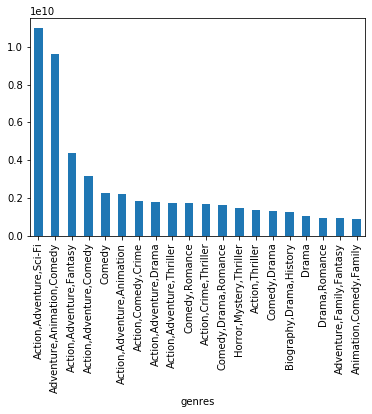

In [453]:
# Top 20 Highest Domestic Grossing Genres produced by studios with total domestic gross > $1M
top_studios_df.groupby('genres').sum().sort_values(ascending=False, 
                                                   by='domestic_gross')['domestic_gross'][:20].plot.bar();


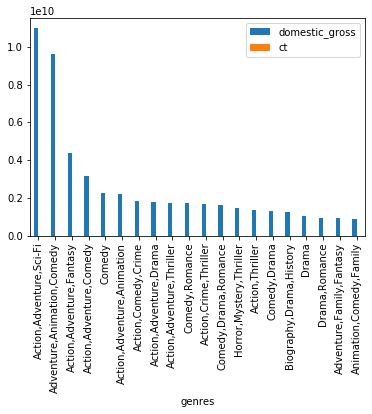

In [442]:
top20_grossing_genres = top_studios_df.groupby('genres').sum() \
                              .sort_values(ascending=False, by='domestic_gross')[['domestic_gross','ct']][:20]
top20_grossing_genres.plot.bar()

## Domestic gross and movie counts on the same plot

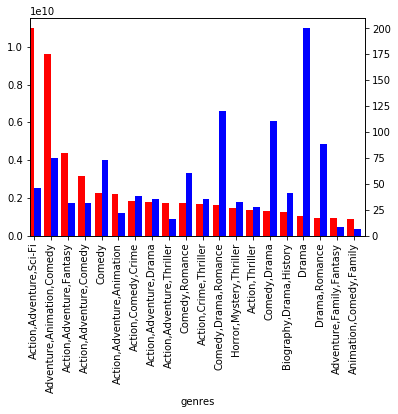

In [443]:
df = top20_grossing_genres
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.domestic_gross.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.ct.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


## Average domestic gross per title

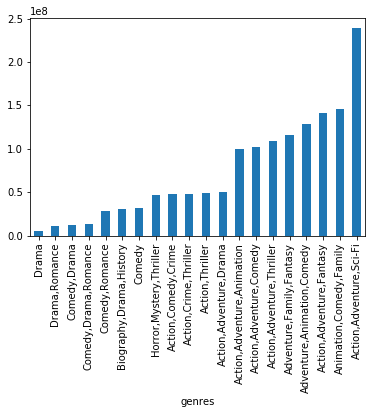

In [444]:
(df.domestic_gross / df.ct).sort_values().plot.bar()

In [459]:
top20_counts_df = top_studios_df[top_studios_df.genres.isin(top20_grossing_genres)].groupby('genres').count().sort_values(ascending=False, by='tconst')

In [458]:
#top20_counts_df.plot.bar()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)


In [ ]:
#long_df.genre.value_counts().plot.bar();

## Merge 'The Numbers' data set with our studio data

In [464]:
tn_df = pd.read_csv(DATA_DIRECTORY + 'tn.movie_budgets.csv.gz')
tn_df['ct']=1
tn_df['release_year'] = pd.to_datetime(tn_df.release_date).dt.year
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ct,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",1,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1,2017


In [465]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
ct                   5782 non-null int64
release_year         5782 non-null int64
dtypes: int64(3), object(5)
memory usage: 361.5+ KB


In [471]:
# Remove duplicate titles from TN dataset, taking the title with the latest release year
tn_df_dedup = tn_df[tn_df['release_year'] == tn_df.groupby(['movie'])['release_year'].transform(max)]
tn_df_dedup.head()
tn_df.groupby(['movie'])['release_year'].transform(max)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ct,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",1,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",1,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1,2017


In [4]:
df.groupby(['movie'])['release_year'].transform(max)

NameError: name 'df' is not defined

In [472]:
top_studios_df.shape

(2440, 13)

In [473]:
tn_cols = ['movie','release_date', 'production_budget', 'domestic_gross', 'worldwide_gross']
top_studios_df_and_tn = top_studios_df.merge(tn_df_dedup[tn_cols], how="inner", left_on='primary_title', right_on='movie')
top_studios_df_and_tn.shape

(1148, 18)

In [ ]:
tn_cols = ['movie','release_date', 'production_budget', 'domestic_gross', 'worldwide_gross']
top_studios_df_and_tn = top_studios_df.merge(tn_df_dedup[tn_cols], how="inner", left_on='primary_title', right_on='movie')


In [486]:
tn_df_dedup[tn_df_dedup.movie.str.contains('Star Wars')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ct,release_year
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",1,2015
11,12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",1,2018
44,45,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",1,2016
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677","$1,027,044,677",1,1999
304,5,"May 19, 2005",Star Wars Ep. III: Revenge of the Sith,"$115,000,000","$380,270,577","$848,998,877",1,2005
305,6,"May 16, 2002",Star Wars Ep. II: Attack of the Clones,"$115,000,000","$310,676,740","$656,695,615",1,2002
1783,84,"May 25, 1983",Star Wars Ep. VI: Return of the Jedi,"$32,500,000","$309,205,079","$572,705,079",1,1983
2367,68,"May 21, 1980",Star Wars Ep. V: The Empire Strikes Back,"$23,000,000","$290,271,960","$534,161,334",1,1980
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,"$11,000,000","$460,998,007","$786,598,007",1,1977


## Joining to TN dropped roughly 1200 titles
- This is due to slight variations in punctuation or use of numbers in the title.
- As a result some top grossing movies were dropped, including The last jedi, Guardians of the Galaxy.  
- The full list of dropped movies is shown below

In [487]:
top_studios_df[top_studios_df.primary_title.str.contains('Star Wars')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,ct
1507,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.00,"Action,Adventure,Sci-Fi",7.80,"478,592.00",BV,"532,200,000.00",523900000,2016,1
1622,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135.00,"Action,Adventure,Fantasy",7.00,"226,243.00",BV,"213,800,000.00",179200000,2018,1
1653,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00",712400000,2017,1


In [478]:
# Titles from our project dataset that got dropped when joining with TN dataset on title
top_studios_df[~top_studios_df.primary_title.isin(top_studios_df_and_tn.movie)].sort_values('numvotes', ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,ct
1981,tt1504320,The King's Speech,The King's Speech,2010,118.00,"Biography,Drama,History",8.00,"593,629.00",Wein.,"135,500,000.00",275400000,2010,1
765,tt3896198,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Vol. 2,2017,136.00,"Action,Adventure,Comedy",7.70,"482,917.00",BV,"389,800,000.00",473900000,2017,1
1653,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.00,"Action,Adventure,Fantasy",7.10,"462,903.00",BV,"620,200,000.00",712400000,2017,1
462,tt1570728,"Crazy, Stupid, Love.","Crazy, Stupid, Love.",2011,118.00,"Comedy,Drama,Romance",7.40,"436,830.00",WB,"84,400,000.00",58500000,2011,1
1217,tt1229238,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.00,"Action,Adventure,Thriller",7.40,"428,142.00",Par.,"209,400,000.00",485300000,2011,1
628,tt1905041,Fast & Furious 6,Furious 6,2013,130.00,"Action,Crime,Thriller",7.10,"346,747.00",Uni.,"238,700,000.00",550000000,2013,1
1542,tt0446029,Scott Pilgrim vs. the World,Scott Pilgrim vs. the World,2010,112.00,"Action,Comedy,Fantasy",7.50,"339,338.00",Uni.,"31,500,000.00",16100000,2010,1
1218,tt2381249,Mission: Impossible - Rogue Nation,Mission: Impossible - Rogue Nation,2015,131.00,"Action,Adventure,Thriller",7.40,"311,704.00",Par.,"195,000,000.00",487700000,2015,1
1928,tt1951261,The Hangover Part III,The Hangover Part III,2013,100.00,"Adventure,Comedy,Crime",5.80,"270,695.00",WB,"112,200,000.00",249800000,2013,1
1439,tt0473075,Prince of Persia: The Sands of Time,Prince of Persia: The Sands of Time,2010,116.00,"Action,Adventure,Fantasy",6.60,"254,975.00",BV,"90,800,000.00",245600000,2010,1


In [ ]:
#top_studios_df_and_tn.groupby('studio').count().sort_values(ascending=False, by='tconst')

In [470]:
top_studios_df_and_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 18 columns):
tconst               1148 non-null object
primary_title        1148 non-null object
original_title       1148 non-null object
start_year           1148 non-null int64
runtime_minutes      1148 non-null float64
genres               1148 non-null object
averagerating        1147 non-null float64
numvotes             1147 non-null float64
studio               1148 non-null object
domestic_gross_x     1147 non-null float64
foreign_gross        1002 non-null object
year                 1148 non-null int64
ct                   1148 non-null int64
movie                1148 non-null object
release_date         1148 non-null object
production_budget    1148 non-null object
domestic_gross_y     1148 non-null object
worldwide_gross      1148 non-null object
dtypes: float64(4), int64(3), object(11)
memory usage: 170.4+ KB


In [ ]:
top_studios_df_and_tn.head()

In [ ]:
top_studios_df_and_tn.info()

## Convert numeric columns to floats by stripping punctuation

In [488]:
top_studios_df_and_tn.domestic_gross_y = top_studios_df_and_tn.domestic_gross_y.apply(lambda x: strip_punctuation_from_number_string(x)).astype(float)
top_studios_df_and_tn

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,year,ct,movie,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery",7.20,"260,383.00",Par.,"72,100,000.00",38100000,2016,1,10 Cloverfield Lane,"Mar 11, 2016","$5,000,000","72,082,999.00","$108,286,422"
1,tt1413492,12 Strong,12 Strong,2018,130.00,"Action,Drama,History",6.60,"50,155.00",WB,"45,800,000.00",21600000,2018,1,12 Strong,"Jan 19, 2018","$35,000,000","45,819,713.00","$71,118,378"
2,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.00,"Biography,Drama,History",8.10,"577,301.00",FoxS,"56,700,000.00",131100000,2013,1,12 Years a Slave,"Oct 18, 2013","$20,000,000","56,671,993.00","$181,025,343"
3,tt1542344,127 Hours,127 Hours,2010,94.00,"Adventure,Biography,Drama",7.60,"323,949.00",FoxS,"18,300,000.00",42400000,2010,1,127 Hours,"Nov 5, 2010","$18,000,000","18,335,230.00","$60,217,171"
4,tt2059171,13 Sins,13 Sins,2014,93.00,"Horror,Thriller",6.30,"29,550.00",RTWC,"13,800.00",NaN,2014,1,13 Sins,"Apr 18, 2014","$4,000,000","9,134.00","$47,552"
5,tt1272878,2 Guns,2 Guns,2013,109.00,"Action,Comedy,Crime",6.70,"182,025.00",Uni.,"75,600,000.00",56300000,2013,1,2 Guns,"Aug 2, 2013","$61,000,000","75,612,460.00","$132,493,015"
6,tt1232829,21 Jump Street,21 Jump Street,2012,109.00,"Action,Comedy,Crime",7.20,"477,771.00",Sony,"138,400,000.00",63100000,2012,1,21 Jump Street,"Mar 16, 2012","$42,000,000","138,447,667.00","$202,812,429"
7,tt2294449,22 Jump Street,22 Jump Street,2014,112.00,"Action,Comedy,Crime",7.00,"319,504.00",Sony,"191,700,000.00",139600000,2014,1,22 Jump Street,"Jun 13, 2014","$50,000,000","191,719,337.00","$331,333,876"
8,tt2172934,3 Days to Kill,3 Days to Kill,2014,117.00,"Action,Drama,Thriller",6.20,"81,681.00",Rela.,"30,700,000.00",21900000,2014,1,3 Days to Kill,"Feb 21, 2014","$28,000,000","30,697,999.00","$38,959,900"
9,tt1622547,30 Minutes or Less,30 Minutes or Less,2011,83.00,"Action,Comedy,Crime",6.10,"87,254.00",Sony,"37,100,000.00",3500000,2011,1,30 Minutes or Less,"Aug 12, 2011","$28,000,000","37,053,924.00","$40,966,716"


In [489]:
top_studios_df_and_tn.worldwide_gross = top_studios_df_and_tn.worldwide_gross.apply(lambda x: strip_punctuation_from_number_string(x)).astype(float)


In [490]:
top_studios_df_and_tn.production_budget = top_studios_df_and_tn.production_budget.apply(lambda x: strip_punctuation_from_number_string(x)).astype(float)


## Rename some of the columns and calculate some new columns

In [494]:

top_studios_df_and_tn = top_studios_df_and_tn.rename(columns={'domestic_gross_x':'bom_dom_gross',
                                                              'foreign_gross': 'bom_for_gross',
                                                              'production_budget': 'tn_prod_budget',
                                                              'domestic_gross_y':'tn_dom_gross',
                                                              'worldwide_gross': 'tn_world_gross'})

In [495]:
top_studios_df_and_tn['tn_profit'] = top_studios_df_and_tn['tn_world_gross'] - top_studios_df_and_tn['tn_prod_budget']

In [496]:
top_studios_df_and_tn['tn_roi'] = top_studios_df_and_tn['tn_profit']/top_studios_df_and_tn['tn_prod_budget'] 

In [497]:
top_studios_df_and_tn = top_studios_df_and_tn.drop('movie', axis=1)

In [ ]:
top_studios_df_and_tn.info()


In [680]:
top10_roi_genres = top_studios_df_and_tn.groupby('genres').mean().sort_values(ascending=False, 
                                                   by='tn_roi')['tn_roi'][:10]
top10_roi_genres.index

Index(['Horror,Mystery,Thriller', 'Horror', 'Adventure,Horror',
       'Comedy,Documentary', 'Biography,Drama,Fantasy',
       'Drama,Horror,Thriller', 'Comedy,Fantasy', 'Action,Mystery,Sci-Fi',
       'Horror,Thriller', 'Adventure,Drama,Fantasy'],
      dtype='object', name='genres')

In [737]:
all_roi_genres = top_studios_df_and_tn.sort_values(ascending=False, by='tn_roi')[['primary_title','tn_roi','genres']][:500]
all_roi_genres['ct']=1
df_grouped = all_roi_genres.groupby('genres').count().sort_values(ascending=False, by='ct')
top_genres = df_grouped[df_grouped['ct']>2]
top_genres.shape




(50, 3)

## Try to remap the categories into simpler ones

In [775]:
top_studios_df_and_tn[top_studios_df_and_tn.genres.isin(animation_genres)].groupby('genres').sum()['ct']



In [778]:
animation_genres = top_studios_df_and_tn[top_studios_df_and_tn.genres.str.contains('Animation')].genres.unique()
print(len(animation_genres))
animation_genres
top_studios_df_and_tn[top_studios_df_and_tn.genres.isin(animation_genres)].groupby('genres').sum()['ct']

8


genres
Action,Adventure,Animation    13
Action,Animation,Comedy        3
Adventure,Animation,Comedy    61
Adventure,Animation,Drama      1
Adventure,Animation,Family     3
Animation,Comedy,Drama         1
Animation,Comedy,Family        5
Animation,Drama,Fantasy        1
Name: ct, dtype: int64

In [779]:
family_genres = top_studios_df_and_tn[(~top_studios_df_and_tn.genres.isin(animation_genres)) &
                                        (top_studios_df_and_tn.genres.str.contains('Family'))].genres.unique()
print(len(family_genres))
family_genres
top_studios_df_and_tn[top_studios_df_and_tn.genres.isin(family_genres)].groupby('genres').sum()['ct']

16


genres
Action,Adventure,Family     5
Action,Comedy,Family        2
Action,Drama,Family         2
Action,Family,Fantasy       1
Adventure,Comedy,Family     9
Adventure,Drama,Family      3
Adventure,Family,Fantasy    8
Adventure,Family,Sci-Fi     1
Biography,Drama,Family      4
Comedy,Drama,Family         4
Comedy,Family               9
Comedy,Family,Fantasy       2
Comedy,Family,Romance       2
Drama,Family                5
Drama,Family,Music          1
Drama,Family,Sport          1
Name: ct, dtype: int64

27 out of 190 genres contain the word 'Horror'

In [804]:
horror_genres = top_studios_df_and_tn[(~top_studios_df_and_tn.genres.isin(animation_genres)) &
                                      (~top_studios_df_and_tn.genres.isin(family_genres)) &
                                        (top_studios_df_and_tn.genres.str.contains('Horror'))].genres.unique()
len(horror_genres)
horror_df = top_studios_df_and_tn[top_studios_df_and_tn.genres.isin(horror_genres)])

122

In [791]:
unmapped_genres = top_studios_df_and_tn[(~top_studios_df_and_tn.genres.isin(animation_genres)) &
                                        (~top_studios_df_and_tn.genres.isin(family_genres)) &
                                        (~top_studios_df_and_tn.genres.isin(horror_genres))].genres.unique()
#unmapped_genres.groupby('genres').sum()['ct']
len(unmapped_genres)

139

In [793]:
action_genres=top_studios_df_and_tn[(top_studios_df_and_tn.genres.isin(unmapped_genres)) &
                                        ((top_studios_df_and_tn.genres.str.contains('Action')) |
                                        (top_studios_df_and_tn.genres.str.contains('Adventure')))].genres.unique()
print(len(action_genres))
action_genres

60


array(['Action,Drama,History', 'Adventure,Biography,Drama',
       'Action,Comedy,Crime', 'Action,Drama,Thriller',
       'Action,Adventure,Drama', 'Action,Drama,War', 'Adventure,Comedy',
       'Action,Thriller', 'Action,Crime,Drama',
       'Adventure,Biography,Comedy', 'Action,Mystery,Thriller',
       'Action,Adventure,Biography', 'Action,Crime,Mystery',
       'Action,Drama,Romance', 'Adventure,Drama,Romance',
       'Action,Biography,Comedy', 'Action,Biography,Drama',
       'Action,Comedy,Sci-Fi', 'Action,Adventure,Comedy',
       'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Drama', 'Action,Comedy,Drama', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Western',
       'Action,Crime', 'Action,Drama,Mystery', 'Action,Adventure,Mystery',
       'Action,Drama,Fantasy', 'Action,Crime,Sci-Fi',
       'Action,Fantasy,Thriller', 'Action,Sci-Fi', 'Action,Drama,Sci-Fi',
       'Action,Adventure', 'Adventure,Comedy,Drama',
       'Acti

In [800]:
unmapped_genres = top_studios_df_and_tn[(~top_studios_df_and_tn.genres.isin(animation_genres)) &
                                        (~top_studios_df_and_tn.genres.isin(family_genres)) &
                                        (~top_studios_df_and_tn.genres.isin(action_genres)) &
                                        (~top_studios_df_and_tn.genres.isin(horror_genres))].genres.unique()
#unmapped_genres.groupby('genres').sum()['ct']
len(unmapped_genres)
s = top_studios_df_and_tn[top_studios_df_and_tn.genres.isin(unmapped_genres)].groupby('genres').sum()['ct']
s.sort_values(ascending=False)


genres
Comedy,Drama,Romance        50
Comedy,Drama                39
Comedy                      37
Drama                       35
Drama,Romance               30
Comedy,Romance              29
Biography,Drama,History     21
Drama,Thriller              18
Biography,Comedy,Drama      17
Crime,Drama,Thriller        17
Biography,Drama             16
Crime,Drama                 13
Biography,Crime,Drama       11
Crime,Drama,Mystery         10
Comedy,Crime,Drama           9
Comedy,Drama,Music           8
Biography,Drama,Sport        8
Drama,Sport                  8
Drama,Mystery,Thriller       7
Drama,Mystery,Sci-Fi         7
Drama,Fantasy,Romance        7
Biography,Drama,Thriller     7
Comedy,Crime                 6
Drama,Music                  6
Biography,Drama,Romance      6
Biography,Drama,Music        5
Comedy,Drama,Fantasy         4
Comedy,Fantasy               4
Drama,Music,Romance          4
Drama,Romance,Sci-Fi         4
                            ..
Drama,Sci-Fi                 2
D

## Create a dataframe that just has titles from our project dataset with ROI greater than 10x multiplier
- Print out some mean statistics on the project dataset overall vs just the 10x ROI subset

Index(['Uni.', 'WB (NL)', 'Par.', 'Fox', 'WB', 'LGF', 'Sony', 'FoxS', 'BV',
       'Wein.'],
      dtype='object', name='studio')


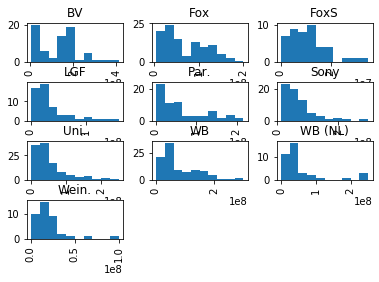

In [511]:
top_roi = top_studios_df_and_tn[top_studios_df_and_tn['tn_roi']>1]
top_roi_studios_df = top_studios_df_and_tn[top_studios_df_and_tn['tn_roi']>1].groupby(['studio']).sum()\
                    .sort_values(by='tn_roi', ascending=False)[:10]
print(top_roi_studios_df.index)
top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)]['tn_prod_budget'].hist(by=top_studios_df_and_tn['studio']);
#top_roi_studios_df

In [512]:
print("Mean number of votes among studios with top ROI"
      , top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)]['numvotes'].mean())
print("Mean rating among studios with top ROI"
      , top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)]['averagerating'].mean())
print("Mean worldwide_gross among studios with top ROI"
      , top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)]['tn_world_gross'].mean())
print("Mean worldwide_gross among studios for top ROI"
      , top_roi[top_roi['studio'].isin(top_roi_studios_df.index)]['tn_world_gross'].mean())
print("Mean production budget among studios with top ROI"
      , top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)]['tn_prod_budget'].mean())
print("Mean production budget among studios for top ROI films"
      , top_roi[top_roi['studio'].isin(top_roi_studios_df.index)]['tn_prod_budget'].mean())
print("\nGenres produced among studios with top ROI films:\n"
      , top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)].groupby('genres')['ct'].sum().sort_values(ascending=False))   
print("\nGenres produced among studios for top ROI films:\n"
      , top_roi[top_roi['studio'].isin(top_roi_studios_df.index)].groupby('genres')['ct'].sum().sort_values(ascending=False))   

Mean number of votes among studios with top ROI 173839.90883190883
Mean rating among studios with top ROI 6.491595441595434
Mean worldwide_gross among studios with top ROI 225943997.008547
Mean worldwide_gross among studios for top ROI 298281965.7954071
Mean production budget among studios with top ROI 65550566.452991456
Mean production budget among studios for top ROI films 69439243.52818371

Genres produced among studios with top ROI films:
 genres
Adventure,Animation,Comedy    53
Action,Adventure,Sci-Fi       41
Comedy                        29
Comedy,Drama,Romance          22
Comedy,Romance                21
Action,Comedy,Crime           21
Comedy,Drama                  21
Action,Adventure,Fantasy      20
Horror,Mystery,Thriller       20
Action,Adventure,Drama        17
Action,Adventure,Comedy       16
Drama,Romance                 16
Biography,Drama,History       15
Action,Crime,Drama            12
Action,Crime,Thriller         11
Biography,Comedy,Drama        11
Action,Thriller  

In [504]:
top_studios_df_and_tn[top_studios_df_and_tn['studio']=='Uni.'].sort_values('tn_roi', ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,bom_dom_gross,bom_for_gross,year,ct,release_date,tn_prod_budget,tn_dom_gross,tn_world_gross,tn_profit,tn_roi
1078,tt3713166,Unfriended,Unfriended,2014,83.00,"Horror,Mystery,Thriller",5.60,"62,043.00",Uni.,"32,500,000.00",31600000,2015,1,"Apr 17, 2015","1,000,000.00","32,789,645.00","64,364,198.00","63,364,198.00",63.36
744,tt4972582,Split,Split,2016,117.00,"Horror,Thriller",7.30,"358,543.00",Uni.,"138,300,000.00",140200000,2017,1,"Jan 20, 2017","5,000,000.00","138,141,585.00","278,964,806.00","273,964,806.00",54.79
313,tt5052448,Get Out,Get Out,2017,104.00,"Horror,Mystery,Thriller",7.70,"400,474.00",Uni.,"176,000,000.00",79400000,2017,1,"Feb 24, 2017","5,000,000.00","176,040,665.00","255,367,951.00","250,367,951.00",50.07
981,tt2184339,The Purge,The Purge,2013,85.00,"Horror,Thriller",5.70,"183,549.00",Uni.,"64,500,000.00",24900000,2013,1,"Jun 7, 2013","3,000,000.00","64,473,115.00","91,266,581.00","88,266,581.00",29.42
1069,tt6772950,Truth or Dare,Truth or Dare,2018,100.00,"Horror,Thriller",5.20,"33,621.00",Uni.,"41,400,000.00",53900000,2018,1,"Apr 13, 2018","3,500,000.00","41,411,015.00","95,127,344.00","91,627,344.00",26.18
338,tt5308322,Happy Death Day,Happy Death Day,2017,96.00,"Horror,Mystery,Thriller",6.50,"87,132.00",Uni.,"55,700,000.00",69800000,2017,1,"Oct 13, 2017","5,000,000.00","55,683,845.00","125,010,260.00","120,010,260.00",24.00
587,tt1204977,Ouija,Ouija,2014,89.00,"Horror,Mystery,Thriller",4.50,"44,054.00",Uni.,"50,900,000.00",52700000,2014,1,"Oct 24, 2014","5,000,000.00","50,856,010.00","103,300,632.00","98,300,632.00",19.66
1026,tt3567288,The Visit,The Visit,2015,94.00,"Horror,Mystery,Thriller",6.20,"102,459.00",Uni.,"65,200,000.00",33200000,2015,1,"Sep 11, 2015","5,000,000.00","65,206,105.00","98,677,816.00","93,677,816.00",18.74
395,tt5726086,Insidious: The Last Key,Insidious: The Last Key,2018,103.00,"Horror,Mystery,Thriller",5.70,"42,154.00",Uni.,"67,700,000.00",100100000,2018,1,"Jan 5, 2018","10,000,000.00","67,745,330.00","167,885,588.00","157,885,588.00",15.79
536,tt2293640,Minions,Minions,2015,91.00,"Adventure,Animation,Comedy",6.40,"193,917.00",Uni.,"336,000,000.00",823400000,2015,1,"Jul 10, 2015","74,000,000.00","336,045,770.00","1,160,336,173.00","1,086,336,173.00",14.68


In [519]:
top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['ct'].sum().sort_values(ascending=False)

studio
Uni.       115
Fox        106
WB          97
BV          70
Sony        69
Par.        69
LGF         55
FoxS        45
Wein.       39
WB (NL)     37
Name: ct, dtype: int64

In [520]:
top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['ct'].sum().sort_values(ascending=False)

studio
Uni.       85
Fox        77
Sony       55
WB         53
Par.       49
BV         47
LGF        36
WB (NL)    28
Wein.      27
FoxS       22
Name: ct, dtype: int64

In [583]:
all_prod_budgets = top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['tn_prod_budget'].sum().sort_values(ascending=False)
all_prod_budgets

studio
BV        9,334,800,000.00
WB        8,059,000,000.00
Fox       7,497,000,000.00
Uni.      6,362,700,000.00
Sony      4,844,500,000.00
Par.      4,517,000,000.00
WB (NL)   2,148,600,000.00
LGF       1,964,887,650.00
Wein.       796,100,000.00
FoxS        491,910,000.00
Name: tn_prod_budget, dtype: float64

In [584]:
all_prod_budgets_avg = top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['tn_prod_budget'].mean().sort_values(ascending=False)
all_prod_budgets_avg

studio
BV        133,354,285.71
WB         83,082,474.23
Fox        70,726,415.09
Sony       70,210,144.93
Par.       65,463,768.12
WB (NL)    58,070,270.27
Uni.       55,327,826.09
LGF        35,725,230.00
Wein.      20,412,820.51
FoxS       10,931,333.33
Name: tn_prod_budget, dtype: float64

In [522]:
top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['tn_prod_budget'].mean().sort_values(ascending=False)

studio
BV        147,582,978.72
WB         93,679,245.28
Fox        78,961,038.96
Sony       71,936,363.64
Par.       65,795,918.37
WB (NL)    58,450,000.00
Uni.       52,049,411.76
LGF        36,396,879.17
Wein.      18,540,740.74
FoxS       10,355,000.00
Name: tn_prod_budget, dtype: float64

In [565]:
all_world_gross = top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['tn_world_gross'].sum().sort_values(ascending=False)
all_world_gross

studio
BV        33,005,492,430.00
Uni.      26,983,322,957.00
Fox       25,970,716,879.00
WB        21,964,047,930.00
Sony      16,935,293,274.00
Par.      13,733,109,035.00
WB (NL)    8,540,864,247.00
LGF        6,599,606,161.00
Wein.      2,738,049,893.00
FoxS       2,142,183,094.00
Name: tn_world_gross, dtype: float64

In [566]:
all_world_gross_avg = top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['tn_world_gross'].mean().sort_values(ascending=False)
all_world_gross_avg

studio
BV        471,507,034.71
Sony      245,439,032.96
Fox       245,006,763.01
Uni.      234,637,590.93
WB (NL)   230,834,168.84
WB        226,433,483.81
Par.      199,030,565.72
LGF       119,992,839.29
Wein.      70,206,407.51
FoxS       47,604,068.76
Name: tn_world_gross, dtype: float64

In [567]:
top_roi_world_gross = top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['tn_world_gross'].sum().sort_values(ascending=False)
top_roi_world_gross

studio
BV        30,063,090,690.00
Uni.      25,019,118,762.00
Fox       23,871,996,093.00
WB        18,046,196,255.00
Sony      15,607,144,392.00
Par.      12,044,603,961.00
WB (NL)    7,986,136,144.00
LGF        5,885,657,918.00
Wein.      2,507,084,056.00
FoxS       1,846,033,345.00
Name: tn_world_gross, dtype: float64

In [568]:
top_roi_world_gross_avg = top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['tn_world_gross'].mean().sort_values(ascending=False)
top_roi_world_gross_avg

studio
BV        639,640,227.45
WB        340,494,268.96
Fox       310,025,923.29
Uni.      294,342,573.67
WB (NL)   285,219,148.00
Sony      283,766,261.67
Par.      245,808,244.10
LGF       163,490,497.72
Wein.      92,854,965.04
FoxS       83,910,606.59
Name: tn_world_gross, dtype: float64

In [447]:
top_studios_df_and_tn[top_studios_df_and_tn['studio'].isin(top_roi_studios_df.index)].groupby('studio')['averagerating'].mean()

studio
FD        6.30
FoxS      6.88
LG/S      6.44
LGF       6.33
Par.      6.37
TriS      6.67
Uni.      6.23
WB        6.58
WB (NL)   6.27
Wein.     7.04
Name: averagerating, dtype: float64

In [525]:
top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['averagerating'].mean().sort_values(ascending=False)

studio
BV        7.32
Wein.     7.26
FoxS      7.20
WB        6.77
Fox       6.54
LGF       6.46
Par.      6.41
WB (NL)   6.39
Uni.      6.32
Sony      6.28
Name: averagerating, dtype: float64

In [526]:
top_studios_df_and_tn[top_studios_df_and_tn['studio']
                      .isin(top_roi_studios_df.index)].groupby('studio')['numvotes'].mean().sort_values(ascending=False)

studio
BV        248,198.91
WB        214,230.29
Par.      204,980.86
Fox       164,946.90
WB (NL)   160,683.46
Sony      160,329.14
Wein.     149,655.33
Uni.      142,804.81
LGF       139,014.60
FoxS      118,675.36
Name: numvotes, dtype: float64

In [527]:
top_roi[top_roi['studio']
        .isin(top_roi_studios_df.index)].groupby('studio')['numvotes'].mean().sort_values(ascending=False)

studio
BV        333,371.77
WB        299,775.06
Par.      256,377.04
Fox       201,457.47
Wein.     197,071.89
WB (NL)   191,490.07
FoxS      184,671.45
Sony      176,138.45
LGF       172,274.39
Uni.      162,229.67
Name: numvotes, dtype: float64

In [528]:
top_studios_df_and_tn.shape

(1148, 19)

Text(0.5, 0, 'Top Studios')

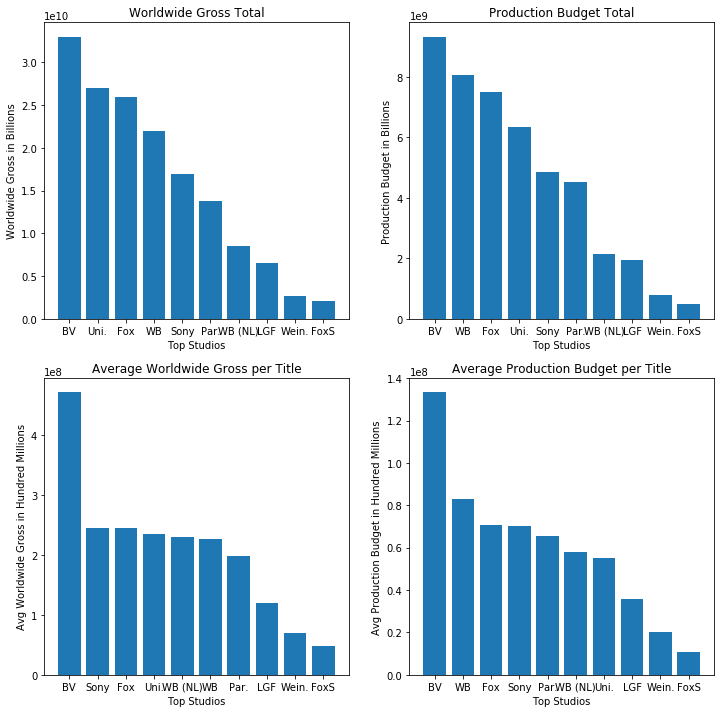

In [605]:
studio_list = ['Universal (Uni.)', '20th Century Fox (Fox)', 'Warner Brothers (WB)',
               'Buena Vista Pictures/Disney (BV)', 'Sony/Columbia Pictures (Sony)', 
               'Paramount Pictures (Par.)', 'Lionsgate Films (LGF)', 'Fox Searchlight (FoxS)',
               'Weinstein (Wein.)', 'Warner Brothers/New Line (WB (NL))']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.bar(all_world_gross.index, all_world_gross);
ax.set_title('Worldwide Gross Total')
ax.set_ylabel('Worldwide Gross in Billions')
ax.set_xlabel('Top Studios')

#fig2 = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot(2, 2, 3)
ax2.bar(all_world_gross_avg.index, all_world_gross_avg);
ax2.set_title('Average Worldwide Gross per Title')
ax2.set_ylabel('Avg Worldwide Gross in Hundred Millions')
ax2.set_xlabel('Top Studios')

#fig3 = plt.figure(figsize=(10, 6))
ax3 = fig.add_subplot(2, 2, 2)
ax3.bar(all_prod_budgets.index, all_prod_budgets);
ax3.set_title('Production Budget Total')
ax3.set_ylabel('Production Budget in Billions')
ax3.set_xlabel('Top Studios')

#fig4 = plt.figure(figsize=(10, 6))
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(all_prod_budgets_avg.index, all_prod_budgets_avg);
ax4.set_title('Average Production Budget per Title')
ax4.set_ylabel('Avg Production Budget in Hundred Millions')
ax4.set_xlabel('Top Studios')

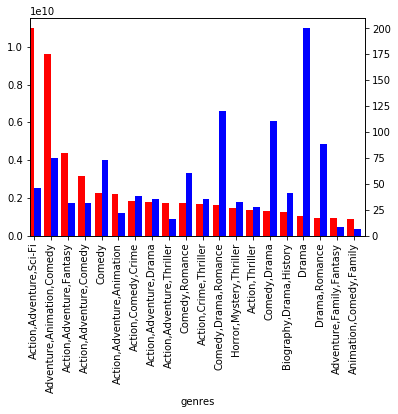

In [606]:
df = top20_grossing_genres
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.domestic_gross.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.ct.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

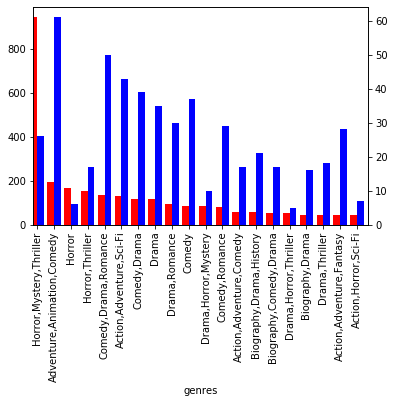

In [611]:
top20_roi_genres = top_studios_df_and_tn.groupby('genres').sum() \
                              .sort_values(ascending=False, by='tn_roi')[['tn_roi','ct']][:20]
#top20_world_gross_genres.plot.bar()

df = top20_roi_genres
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.tn_roi.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.ct.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

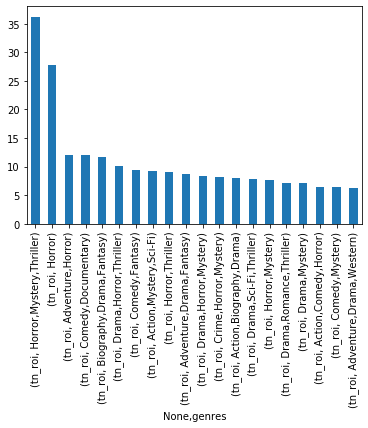

In [624]:
top_studios_df_and_tn.groupby(['genres']).mean()\
    .sort_values(ascending=False, by='tn_roi')[['tn_roi']][:20].unstack().plot.bar();

In [628]:
top_studios_df_and_tn.describe()

,start_year,runtime_minutes,averagerating,numvotes,bom_dom_gross,year,ct,tn_prod_budget,tn_dom_gross,tn_world_gross,tn_profit,tn_roi
count,"1,148.00","1,148.00","1,147.00","1,147.00","1,147.00","1,148.00","1,148.00","1,148.00","1,148.00","1,148.00","1,148.00","1,148.00"
mean,"2,013.58",109.42,6.48,"138,201.23","63,591,248.90","2,013.66",1.00,"49,016,459.08","63,716,244.33","160,541,525.35","111,525,066.27",3.49
std,2.51,17.69,0.93,"172,391.22","87,059,659.61",2.51,0.00,"57,026,970.19","87,001,538.98","241,898,479.10","200,556,776.08",13.88
min,"2,010.00",41.00,1.60,10.00,"1,000.00","2,010.00",1.00,"50,000.00",0.00,0.00,"-110,450,242.00",-1.00
25%,"2,011.00",97.00,5.90,"34,672.50","9,450,000.00","2,011.00",1.00,"11,000,000.00","9,616,762.75","20,772,390.50","3,618,527.00",0.22
50%,"2,013.00",106.00,6.50,"80,510.00","35,100,000.00","2,014.00",1.00,"28,000,000.00","35,353,255.50","70,149,902.50","35,764,245.00",1.49
75%,"2,016.00",119.00,7.10,"167,799.00","78,000,000.00","2,016.00",1.00,"60,000,000.00","78,226,424.00","182,325,247.00","124,673,507.50",3.40
max,"2,018.00",180.00,8.80,"1,841,066.00","700,100,000.00","2,018.00",1.00,"410,600,000.00","700,059,566.00","2,048,134,200.00","1,748,134,200.00",415.56


## Boxplot of ROI without outliers by Genre, for the Top 10 Genres by ROI 

In [675]:
sns.set_context('talk')

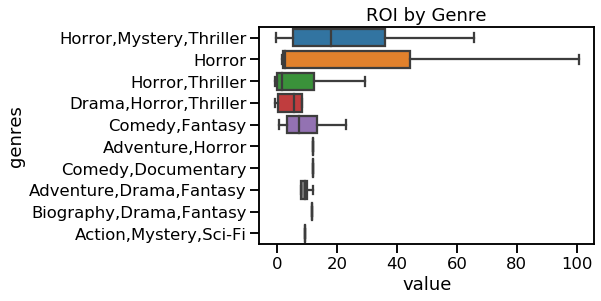

In [759]:
df_long = pd.melt(top_studios_df_and_tn, id_vars =['genres'], value_vars =['tn_roi'])
df_long = df_long[df_long['genres'].isin(top10_roi_genres.index)]\
    .sort_values(ascending=False, by='value')
roi_by_genre = sns.boxplot(data=df_long, x='value', y='genres', showfliers=False)
roi_by_genre.set_title('ROI by Genre');

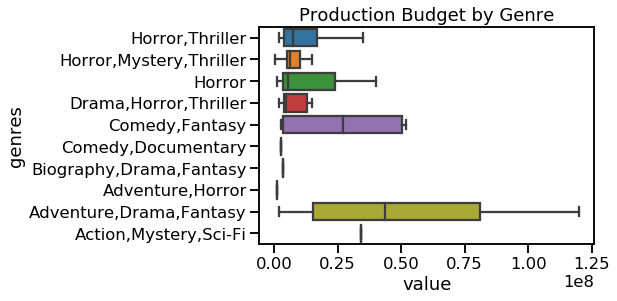

In [724]:
df_long = pd.melt(top_studios_df_and_tn, id_vars =['genres'], value_vars =['tn_prod_budget'])
df_long = df_long[df_long['genres'].isin(top10_roi_genres.index)]\
    .sort_values(ascending=False, by='genres')
budget_by_genre = sns.boxplot(data=df_long, x='value', y='genres', showfliers=False)
budget_by_genre.set_title('Production Budget by Genre');

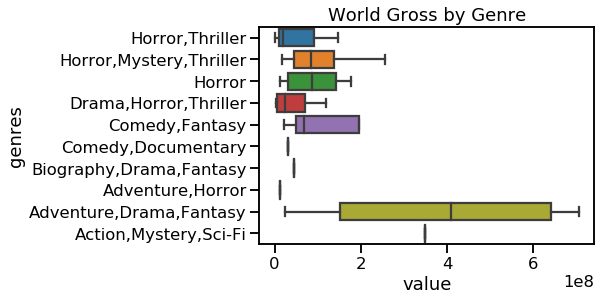

In [697]:
df_long = pd.melt(top_studios_df_and_tn, id_vars =['genres'], value_vars =['tn_world_gross'])
df_long = df_long[df_long['genres'].isin(top10_roi_genres.index)]\
    .sort_values(ascending=False, by='genres')
worldgross_by_genre = sns.boxplot(data=df_long, x='value', y='genres', showfliers=False)
worldgross_by_genre.set_title('World Gross by Genre');

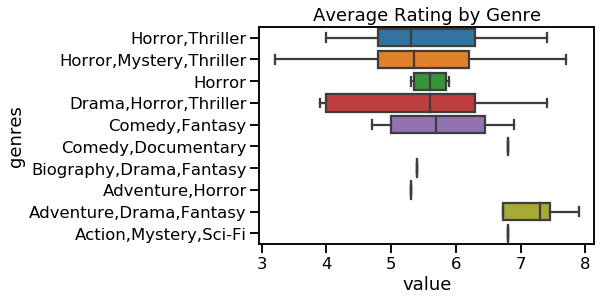

In [696]:
df_long = pd.melt(top_studios_df_and_tn, id_vars =['genres'], value_vars =['averagerating'])
df_long = df_long[df_long['genres'].isin(top10_roi_genres.index)]\
    .sort_values(ascending=False, by='genres')
rating_by_genre = sns.boxplot(data=df_long, x='value', y='genres', showfliers=False)
rating_by_genre.set_title('Average Rating by Genre');

In [700]:
top_studios_df_and_tn[top_studios_df_and_tn['genres'].isin(top10_roi_genres.index)].shape

(66, 19)